
📊 Feature Importance:
       Feature  Importance
3           LF    0.506693
4           HF    0.347540
0         SDNN    0.115079
1        RMSSD    0.030688
2        pNN50    0.000000
5  LF/HF Ratio    0.000000


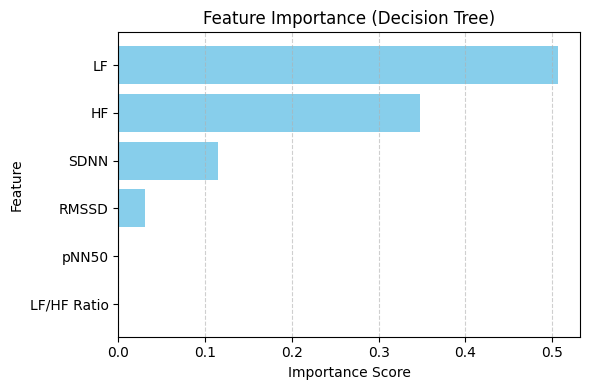

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# === 1. Load dataset ===
df = pd.read_csv("../Data/combine-feature.csv")

# Pilih fitur HRV dan label
X = df[["SDNN", "RMSSD", "pNN50", "LF", "HF", "LF/HF Ratio"]]
y = df["Class"]

# Normalisasi (optional, Decision Tree tidak wajib)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 2. Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# === 3. Train Decision Tree ===
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# === 4. Ambil feature importance ===
importances = dt.feature_importances_
feature_names = X.columns

# Simpan dalam DataFrame biar rapi
fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\n📊 Feature Importance:")
print(fi_df)

# === 5. Visualisasi feature importance ===
plt.figure(figsize=(6,4))
plt.barh(fi_df["Feature"], fi_df["Importance"], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance (Decision Tree)")
plt.gca().invert_yaxis()  # biar paling penting di atas
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()